<a href="https://colab.research.google.com/github/MagnoSales/AluraStoreBR/blob/main/6AnaliseFinal_e_Recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar bibliotecas

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#Importar o DataFrame'

In [41]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#Trabalhar o dataframe, para então iniciar a Análise.

In [42]:
loja['idLoja'] = 'loja1' #criar um campo novo para identificar a loja
loja2['idLoja'] = 'loja2' #criar um campo novo para identificar a loja
loja3['idLoja'] = 'loja3' #criar um campo novo para identificar a loja
loja4['idLoja'] = 'loja4' #criar um campo novo para identificar a loja

In [43]:
# Concatenar todos os DataFrames em um único DataFrame
df_combinado = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Salvar o DataFrame combinado em um novo arquivo CSV
df_combinado.to_csv('lojas_combinadas.csv', index=False)

df_combinado.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,idLoja
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1
3,Micro-ondas,eletrodomesticos,1009.99,54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1


In [44]:
#Renomear colunas para normalizar nomes dos campos
df_combinado = df_combinado.rename(columns={'Categoria do Produto':'catProduto','Preço':'Faturado','Data da Compra':'dtCompra','Local da compra':'localCompra','Avaliação da compra':'avaliacao','Tipo de pagamento':'pagamento','Quantidade de parcelas':'parcelas'}).copy()
df_combinado.head()

,Produto,catProduto,Faturado,Frete,dtCompra,Vendedor,localCompra,avaliacao,pagamento,parcelas,lat,lon,idLoja
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1
3,Micro-ondas,eletrodomesticos,1009.99,54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1


In [45]:
#trasnforma nros em float
pd.options.display.float_format = '{:.2f}'.format
df_combinado.head()

,Produto,catProduto,Faturado,Frete,dtCompra,Vendedor,localCompra,avaliacao,pagamento,parcelas,lat,lon,idLoja
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1
3,Micro-ondas,eletrodomesticos,1009.99,54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1


#1. Análise do faturamento

In [46]:
# Converta dtCompra para datetime
df_combinado['dtCompra'] = pd.to_datetime(df_combinado['dtCompra'], format='%d/%m/%Y')

# Crie a coluna Mês/Ano
df_combinado['Mês/Ano'] = df_combinado['dtCompra'].dt.to_period('M')


df_combinado.head()

,Produto,catProduto,Faturado,Frete,dtCompra,Vendedor,localCompra,avaliacao,pagamento,parcelas,lat,lon,idLoja,Mês/Ano
0,Assistente virtual,eletronicos,219.08,9.25,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1,2021-01
1,Mesa de jantar,moveis,256.35,11.23,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1,2022-05
2,Jogo de tabuleiro,brinquedos,279.51,21.26,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1,2021-03
3,Micro-ondas,eletrodomesticos,1009.99,54.67,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1,2022-05
4,Cadeira de escritório,moveis,446.99,26.96,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1,2020-11


In [47]:
# Certificar-se de que a coluna Preço seja numérica (isto por que na célula seguinte tomei erro por causa disso)
df_combinado['Faturado'] = pd.to_numeric(df_combinado['Faturado'], errors='coerce')
df_combinado.head()

,Produto,catProduto,Faturado,Frete,dtCompra,Vendedor,localCompra,avaliacao,pagamento,parcelas,lat,lon,idLoja,Mês/Ano
0,Assistente virtual,eletronicos,219.08,9.25,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1,2021-01
1,Mesa de jantar,moveis,256.35,11.23,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1,2022-05
2,Jogo de tabuleiro,brinquedos,279.51,21.26,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1,2021-03
3,Micro-ondas,eletrodomesticos,1009.99,54.67,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1,2022-05
4,Cadeira de escritório,moveis,446.99,26.96,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1,2020-11


In [48]:
#Calcula o valor total do faturamento de todas as lojas
df_combinado_total_vendas = df_combinado['Faturado'].sum()
print(f'Faturamento total das lojas : {df_combinado_total_vendas:.2f}')

Faturamento total das lojas : 5871490.79


In [49]:
# Calcular o faturamento de cada loja
df_combinado_loja = df_combinado.groupby('idLoja')['Faturado'].sum().reset_index()

# Adicionar a coluna de percentual ao DataFrame
df_combinado_loja['Participação(%)'] = (df_combinado_loja['Faturado'] / df_combinado_total_vendas) * 100

df_combinado_loja = df_combinado_loja.rename(columns={'idLoja':'Loja'}) #renomear coluna idLoja

df_combinado_loja


# Exibir o DataFrame com formatação de moeda
display(df_combinado_loja.style.format({
    'Faturado': 'R$ {:,.2f}',
    'Participação(%)': '{:.2f}%'
}))


,Loja,Faturado,Participação(%)
0,loja1,"R$ 1,534,509.12",26.13%
1,loja2,"R$ 1,488,459.06",25.35%
2,loja3,"R$ 1,464,025.03",24.93%
3,loja4,"R$ 1,384,497.58",23.58%


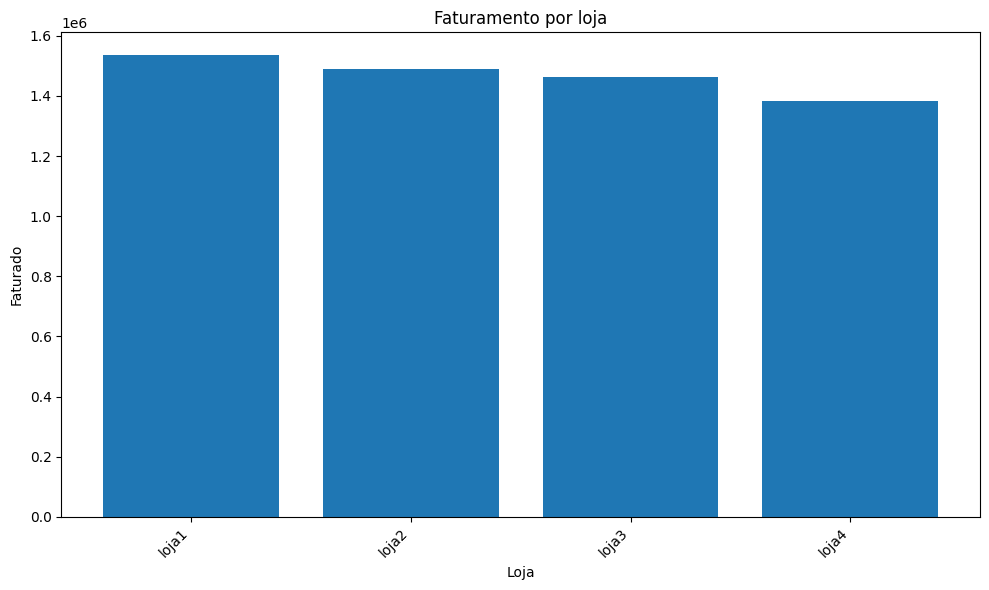

In [50]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_combinado_loja['Loja'], df_combinado_loja['Faturado'])
plt.xlabel('Loja')
plt.ylabel('Faturado')
plt.title('Faturamento por loja')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

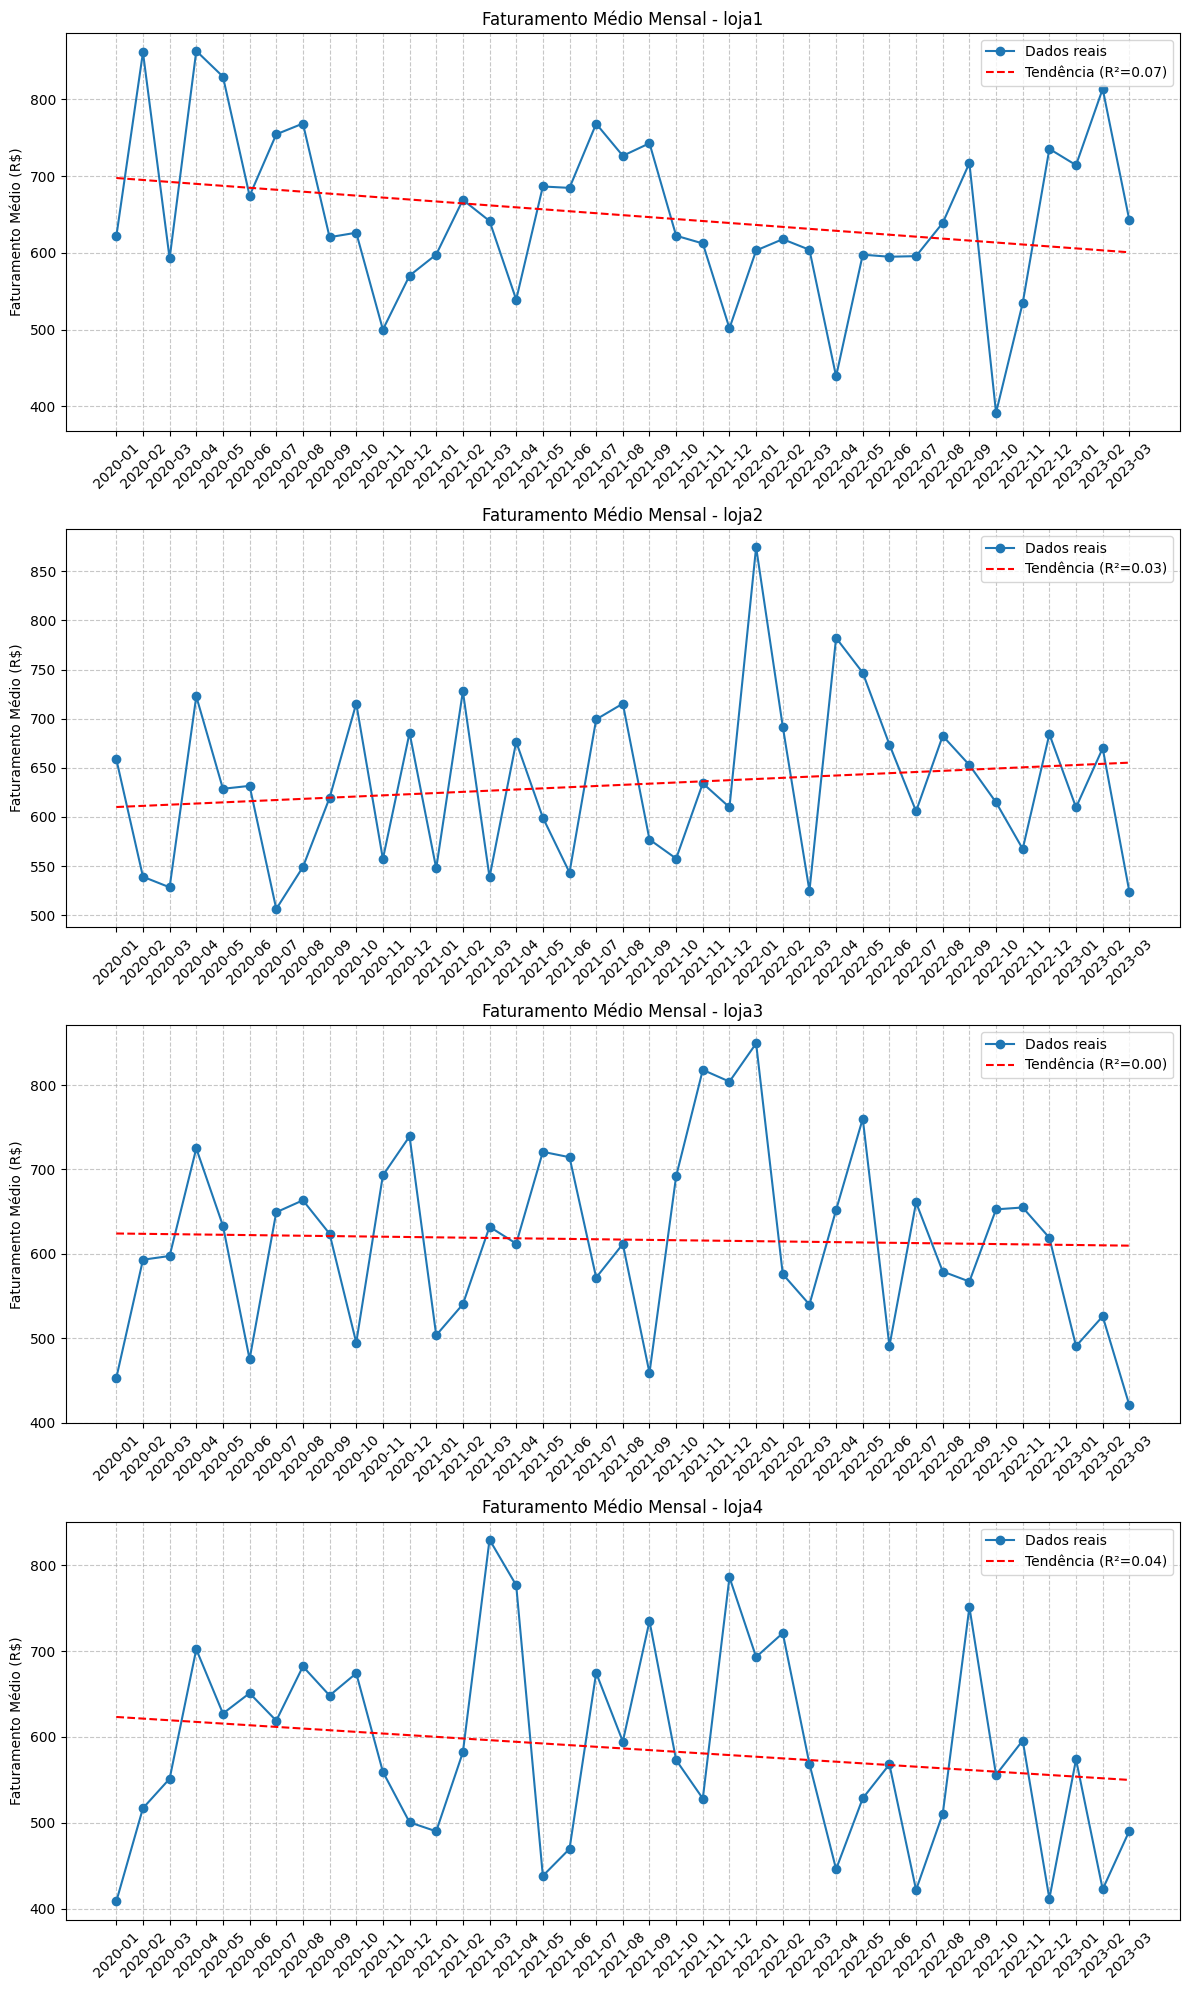

In [51]:


# Criamos a coluna Mês/Ano para indexação temporal
df_combinado['Mês/Ano'] = df_combinado['dtCompra'].dt.to_period('M')

# Agrupamos por Mês/Ano e loja, calculando a média do faturamento
media_mensal_por_loja = df_combinado.groupby(['Mês/Ano', 'idLoja'])['Faturado'].mean().reset_index()

# Identificar as lojas únicas
lojas = df_combinado['idLoja'].unique()

# Criar um subplot para cada loja
fig, axes = plt.subplots(len(lojas), 1, figsize=(12, 5*len(lojas)), sharex=False)

for i, loja in enumerate(lojas):
    # Filtrar dados para a loja atual
    dados_loja = media_mensal_por_loja[media_mensal_por_loja['idLoja'] == loja]

    # Ordenar por Mês/Ano para garantir a sequência temporal correta
    dados_loja = dados_loja.sort_values('Mês/Ano')

    # Converter Mês/Ano para string para plotagem
    x_str = [str(period) for period in dados_loja['Mês/Ano']]
    y = dados_loja['Faturado'].values

    # Plotar os dados reais
    axes[i].plot(x_str, y, 'o-', label='Dados reais')

    # Adicionar linha de tendência
    x_num = np.arange(len(x_str))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_num, y)
    linha_tendencia = intercept + slope * x_num
    axes[i].plot(x_str, linha_tendencia, 'r--', label=f'Tendência (R²={r_value**2:.2f})')

    # Configurar o gráfico
    axes[i].set_title(f'Faturamento Médio Mensal - {loja}')
    axes[i].set_ylabel('Faturamento Médio (R$)')
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].legend()

    # Rotacionar os rótulos do eixo x para melhor legibilidade
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

#Vendas por Categoria

##Calcular a quantidade de vendas por Categoria - Todas as Lojas

In [52]:
# Calcular o valor de faturamento de cada categoria
df_combinado_Categoria = df_combinado.groupby('catProduto')['Faturado'].sum().reset_index()

# Calcular a contagem de produtos por categoria
contagem_produtos = df_combinado.groupby('catProduto')['Produto'].count().reset_index()
contagem_produtos.rename(columns={'Produto': 'Quantidade'}, inplace=True)

# Mesclar a contagem com o dataframe de categorias - precisa fazer isso para alterar o dataframe
df_combinado_Categoria = df_combinado_Categoria.merge(contagem_produtos, on='catProduto', how='left')

# Adicionar a coluna de percentual ao DataFrame
df_combinado_Categoria['Participação no Faturamento(%)'] = (df_combinado_Categoria['Faturado'] / df_combinado_total_vendas) * 100

# Renomear coluna
df_combinado_Categoria = df_combinado_Categoria.rename(columns={'catProduto':'Categoria de Produtos'})

# Ordenar o DataFrame pela coluna 'Quantidade' em ordem decrescente
df_combinado_Categoria = df_combinado_Categoria.sort_values(by='Participação no Faturamento(%)', ascending=False)

# Resetar o índice após a ordenação (opcional)
df_combinado_Categoria = df_combinado_Categoria.reset_index(drop=True)

# Exibir o DataFrame com formatação de moeda
display(df_combinado_Categoria.style.format({
    'Faturado': 'R$ {:,.2f}',
    'Participação no Faturamento(%)': '{:.1f}%',
}))

,Categoria de Produtos,Faturado,Quantidade,Participação no Faturamento(%)
0,eletronicos,"R$ 2,214,099.72",1772,37.7%
1,eletrodomesticos,"R$ 1,766,337.03",1149,30.1%
2,moveis,"R$ 1,010,214.00",1886,17.2%
3,instrumentos musicais,"R$ 465,029.67",753,7.9%
4,esporte e lazer,"R$ 190,635.39",1113,3.2%
5,brinquedos,"R$ 98,140.86",1290,1.7%
6,utilidades domesticas,"R$ 76,773.38",730,1.3%
7,livros,"R$ 50,260.74",742,0.9%


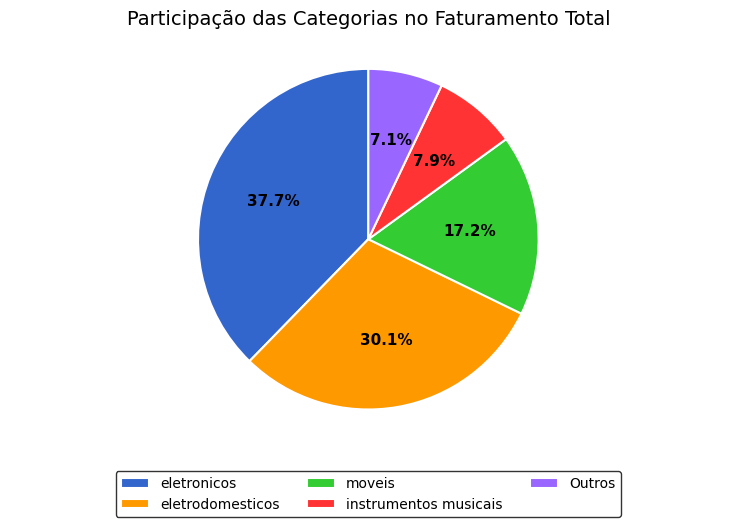

In [53]:
# Copiar o dataframe para não alterar o original
df_plot = df_combinado_Categoria.copy()

# Agrupar categorias com menos de 5% em "Outros"
limite = 5.0
outros = df_plot[df_plot['Participação no Faturamento(%)'] < limite]
principais = df_plot[df_plot['Participação no Faturamento(%)'] >= limite]

# Criar linha para "Outros" se houver categorias pequenas
if not outros.empty:
    linha_outros = pd.DataFrame({
        'Categoria de Produtos': ['Outros'],
        'Participação no Faturamento(%)': [outros['Participação no Faturamento(%)'].sum()]
    })
    df_plot = pd.concat([principais, linha_outros]).reset_index(drop=True)

# Criar o gráfico com melhor organização
plt.figure(figsize=(8, 6))

# Definir cores mais distinguíveis
cores = ['#3366cc', '#ff9900', '#33cc33', '#ff3333', '#9966ff', '#999999']

# Criar a pizza com wedgeprops para destacar as bordas
wedges, texts, autotexts = plt.pie(
    df_plot['Participação no Faturamento(%)'],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    shadow=False,
    colors=cores,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Estilizar os percentuais no gráfico
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

# Adicionar título com espaço adequado
plt.title('Participação das Categorias no Faturamento Total', fontsize=14, pad=20)

# Adicionar legenda mais organizada
plt.legend(
    df_plot['Categoria de Produtos'],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.10),  # Move a legenda para baixo do gráfico
    ncol=3,  # Organiza a legenda em 3 colunas
    fontsize=10,
    frameon=True,
    edgecolor='black'
)

plt.axis('equal')
plt.tight_layout(pad=3.0)
plt.show()

#Vendas de Categoria - por LOJA

In [54]:
def calcular_faturamento_por_categoria_e_loja(df):
    """
    Calcula o faturamento e a quantidade de produtos por categoria para cada loja.

    Args:
        df: DataFrame contendo os dados das vendas.

    Returns:
        Um dicionário onde as chaves são os IDs das lojas e os valores
        são DataFrames com o faturamento e a quantidade de produtos por categoria.
    """

    lojas = df['idLoja'].unique()
    resultados = {}  # Dicionário para armazenar os DataFrames por loja

    for loja in lojas:
        df_loja = df[df['idLoja'] == loja]  # Filtrar dados da loja

        # Calcular o faturamento por categoria
        df_categoria = df_loja.groupby('catProduto')['Faturado'].sum().reset_index()

        # Calcular a contagem de produtos por categoria
        contagem_produtos = df_loja.groupby('catProduto')['Produto'].count().reset_index()
        contagem_produtos.rename(columns={'Produto': 'Quantidade'}, inplace=True)

        # Mesclar a contagem com o DataFrame de categorias
        df_categoria = df_categoria.merge(contagem_produtos, on='catProduto', how='left')

        # Adicionar a coluna de percentual ao DataFrame
        faturamento_total_loja = df_loja['Faturado'].sum()
        df_categoria['Participação no Faturamento(%)'] = (df_categoria['Faturado'] / faturamento_total_loja) * 100

        # Renomear coluna
        df_categoria = df_categoria.rename(columns={'catProduto':'Categoria de Produtos'})

        # Ordenar por participação no faturamento
        df_categoria = df_categoria.sort_values(by='Participação no Faturamento(%)', ascending=False)

        # Resetar o índice
        df_categoria = df_categoria.reset_index(drop=True)

        resultados[loja] = df_categoria  # Armazenar o DataFrame da loja

    return resultados


# Chamar a função e obter os DataFrames por loja
resultados_por_loja = calcular_faturamento_por_categoria_e_loja(df_combinado)

# Exibir todos os DataFrames, um embaixo do outro
for loja, df in resultados_por_loja.items():
    print(f"Vendas de Categorias para {loja}:")
    display(df.style.format({
        'Faturado': 'R$ {:,.2f}',
        'Participação no Faturamento(%)': '{:.1f}%',
    }))


Vendas de Categorias para loja1:


,Categoria de Produtos,Faturado,Quantidade,Participação no Faturamento(%)
0,eletronicos,"R$ 572,659.23",448,37.3%
1,eletrodomesticos,"R$ 484,913.36",312,31.6%
2,moveis,"R$ 250,178.11",465,16.3%
3,instrumentos musicais,"R$ 121,731.69",182,7.9%
4,esporte e lazer,"R$ 52,387.55",284,3.4%
5,brinquedos,"R$ 23,993.78",324,1.6%
6,utilidades domesticas,"R$ 16,931.48",171,1.1%
7,livros,"R$ 11,713.92",173,0.8%


Vendas de Categorias para loja2:


,Categoria de Produtos,Faturado,Quantidade,Participação no Faturamento(%)
0,eletronicos,"R$ 547,773.71",422,36.8%
1,eletrodomesticos,"R$ 464,758.13",305,31.2%
2,moveis,"R$ 235,234.68",442,15.8%
3,instrumentos musicais,"R$ 139,987.03",224,9.4%
4,esporte e lazer,"R$ 46,326.09",275,3.1%
5,brinquedos,"R$ 21,262.21",313,1.4%
6,utilidades domesticas,"R$ 19,662.86",181,1.3%
7,livros,"R$ 13,454.35",197,0.9%


Vendas de Categorias para loja3:


,Categoria de Produtos,Faturado,Quantidade,Participação no Faturamento(%)
0,eletronicos,"R$ 547,699.92",451,37.4%
1,eletrodomesticos,"R$ 438,984.89",278,30.0%
2,moveis,"R$ 268,095.56",499,18.3%
3,instrumentos musicais,"R$ 103,174.45",177,7.0%
4,esporte e lazer,"R$ 47,456.10",277,3.2%
5,brinquedos,"R$ 25,869.20",315,1.8%
6,utilidades domesticas,"R$ 20,080.21",177,1.4%
7,livros,"R$ 12,664.70",185,0.9%


Vendas de Categorias para loja4:


,Categoria de Produtos,Faturado,Quantidade,Participação no Faturamento(%)
0,eletronicos,"R$ 545,966.86",451,39.4%
1,eletrodomesticos,"R$ 377,680.65",254,27.3%
2,moveis,"R$ 256,705.65",480,18.5%
3,instrumentos musicais,"R$ 100,136.50",170,7.2%
4,esporte e lazer,"R$ 44,465.65",277,3.2%
5,brinquedos,"R$ 27,015.67",338,2.0%
6,utilidades domesticas,"R$ 20,098.83",201,1.5%
7,livros,"R$ 12,427.77",187,0.9%


#Média de Avaliação das Lojas

##Analisar as avaliações dos clientes

In [55]:

avaliacoes_por_categoria = df_combinado.groupby('avaliacao')['catProduto'].count().reset_index()
avaliacoes_por_categoria.rename(columns={'catProduto': 'Quantidade'}, inplace=True)

total_de_avaliacoes = df_combinado['avaliacao'].count()
# Adicionar a coluna de percentual ao DataFrame
avaliacoes_por_categoria['Avaliações(%)'] = (avaliacoes_por_categoria['Quantidade'] / total_de_avaliacoes) * 100

print(f'Total de avaliações: {total_de_avaliacoes} Obs: Todas as lojas.')
avaliacoes_por_categoria


Total de avaliações: 9435 Obs: Todas as lojas.


,avaliacao,Quantidade,Avaliações(%)
0,1,1199,12.71
1,2,343,3.64
2,3,830,8.80
3,4,1813,19.22
4,5,5250,55.64


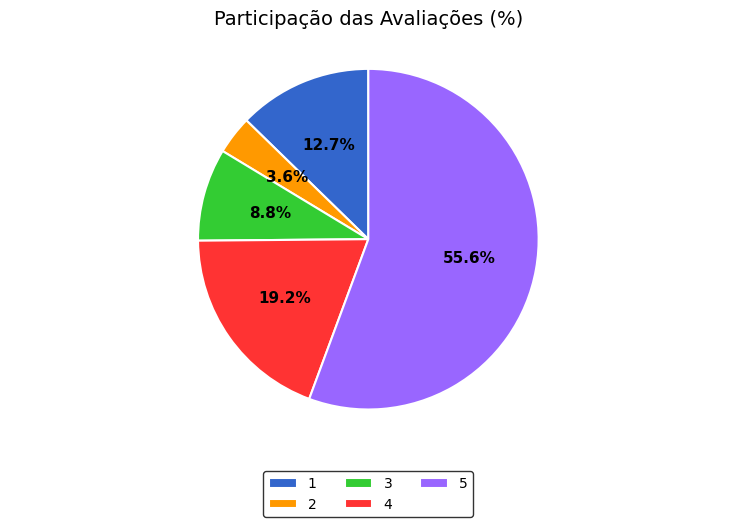

In [56]:
# Copiar o dataframe para não alterar o original
df_plot = avaliacoes_por_categoria.copy()

# Renomear a coluna 'avaliacao' para 'Nivel da avaliação'
df_plot.rename(columns={'avaliacao': 'Nivel da avaliação', 'Avaliações(%)': 'Participação nas Avaliações(%)'}, inplace=True)

# Agrupar categorias com menos de 2% em "Outros"
limite = 2.0
outros = df_plot[df_plot['Participação nas Avaliações(%)'] < limite]
principais = df_plot[df_plot['Participação nas Avaliações(%)'] >= limite]

# Criar linha para "Outros" se houver categorias pequenas
if not outros.empty:
    linha_outros = pd.DataFrame({
        'Nivel da avaliação': ['Outros'],
        'Participação nas Avaliações(%)': [outros['Participação nas Avaliações(%)'].sum()]
    })
    df_plot = pd.concat([principais, linha_outros]).reset_index(drop=True)

# Criar o gráfico
plt.figure(figsize=(8, 6))

# Definir cores mais distinguíveis
cores = ['#3366cc', '#ff9900', '#33cc33', '#ff3333', '#9966ff', '#999999']

# Criar a pizza com wedgeprops para destacar as bordas
wedges, texts, autotexts = plt.pie(
    df_plot['Participação nas Avaliações(%)'],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    shadow=False,
    colors=cores,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Estilizar os percentuais no gráfico
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

# Título ajustado
plt.title('Participação das Avaliações (%)', fontsize=14, pad=20)

# Legenda
plt.legend(
    df_plot['Nivel da avaliação'],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.10),
    ncol=3,
    fontsize=10,
    frameon=True,
    edgecolor='black'
)

plt.axis('equal')
plt.tight_layout(pad=3.0)
plt.show()


In [57]:
def calcular_distribuicao_avaliacoes_por_loja(df):
    """
    Calcula a quantidade e percentual de avaliações por tipo para cada loja.

    Args:
        df: DataFrame contendo os dados das vendas.

    Returns:
        Um dicionário com ID da loja como chave e DataFrame com as colunas:
        'avaliacao', 'Quantidade', 'Avaliações(%)'
    """
    lojas = df['idLoja'].unique()
    resultados = {}

    for loja in lojas:
        df_loja = df[df['idLoja'] == loja]

        # Agrupar por tipo de avaliação e contar
        avaliacoes_por_categoria = df_loja.groupby('avaliacao')['catProduto'].count().reset_index()
        avaliacoes_por_categoria.rename(columns={'catProduto': 'Quantidade'}, inplace=True)

        # Calcular total de avaliações da loja
        total_de_avaliacoes = df_loja['avaliacao'].count()

        # Calcular percentual
        avaliacoes_por_categoria['Avaliações(%)'] = (
            avaliacoes_por_categoria['Quantidade'] / total_de_avaliacoes
        ) * 100

        # Armazenar no dicionário
        resultados[loja] = avaliacoes_por_categoria.sort_values(by='avaliacao').reset_index(drop=True)

    return resultados


# Chamar a função
avaliacoes_por_loja = calcular_distribuicao_avaliacoes_por_loja(df_combinado)

# Exibir os resultados para cada loja
for loja, df in avaliacoes_por_loja.items():
    print(f"Avaliações por Loja - {loja} (Total: {df['Quantidade'].sum()}):")
    display(df.style.format({
        'Avaliações(%)': '{:.2f}%',
        'Quantidade': '{:,.0f}'
    }))


Avaliações por Loja - loja1 (Total: 2359):


,avaliacao,Quantidade,Avaliações(%)
0,1,319,13.52%
1,2,86,3.65%
2,3,218,9.24%
3,4,444,18.82%
4,5,"1,292",54.77%


Avaliações por Loja - loja2 (Total: 2359):


,avaliacao,Quantidade,Avaliações(%)
0,1,273,11.57%
1,2,93,3.94%
2,3,209,8.86%
3,4,482,20.43%
4,5,"1,302",55.19%


Avaliações por Loja - loja3 (Total: 2359):


,avaliacao,Quantidade,Avaliações(%)
0,1,297,12.59%
1,2,79,3.35%
2,3,193,8.18%
3,4,434,18.40%
4,5,"1,356",57.48%


Avaliações por Loja - loja4 (Total: 2358):


,avaliacao,Quantidade,Avaliações(%)
0,1,310,13.15%
1,2,85,3.60%
2,3,210,8.91%
3,4,453,19.21%
4,5,"1,300",55.13%


## Avaliacoes percentual por categoria

In [58]:
def gerar_pivot_avaliacoes_percentual_categoria(df):
    """
    Gera uma pivot table por loja:
    - Índice: categorias de produto (catProduto)
    - Colunas: avaliações (1 a 5)
    - Valores: percentual de cada avaliação dentro da categoria
    """
    lojas = df['idLoja'].unique()
    resultados = {}

    for loja in lojas:
        df_loja = df[df['idLoja'] == loja]

        # Contagem de avaliações por categoria e nota
        contagem = df_loja.groupby(['catProduto', 'avaliacao']).size().reset_index(name='Quantidade')

        # Pivotar: linhas = catProduto, colunas = avaliação, valores = Quantidade
        tabela = contagem.pivot(index='catProduto', columns='avaliacao', values='Quantidade').fillna(0)

        # Calcular percentual por linha (categoria)
        tabela_percentual = tabela.div(tabela.sum(axis=1), axis=0) * 100

        resultados[loja] = tabela_percentual

    return resultados


# Gerar resultado
pivot_avaliacoes_por_loja = gerar_pivot_avaliacoes_percentual_categoria(df_combinado)

# Exibir formatado
for loja, tabela in pivot_avaliacoes_por_loja.items():
    print(f"\nDistribuição percentual de avaliações por categoria - {loja}")
    display(tabela.style.format("{:.1f}%"))



Distribuição percentual de avaliações por categoria - loja1


avaliacao,1,2,3,4,5
catProduto,,,,,
brinquedos,10.8%,4.0%,8.0%,21.0%,56.2%
eletrodomesticos,12.2%,2.6%,11.9%,16.7%,56.7%
eletronicos,12.7%,4.0%,8.5%,19.6%,55.1%
esporte e lazer,13.4%,4.2%,12.7%,18.7%,51.1%
instrumentos musicais,14.8%,3.3%,7.1%,11.5%,63.2%
livros,13.9%,2.9%,10.4%,17.3%,55.5%
moveis,14.2%,3.7%,8.2%,21.3%,52.7%
utilidades domesticas,19.9%,4.1%,7.0%,19.3%,49.7%



Distribuição percentual de avaliações por categoria - loja2


avaliacao,1,2,3,4,5
catProduto,,,,,
brinquedos,13.1%,2.2%,10.2%,17.9%,56.5%
eletrodomesticos,9.8%,4.3%,10.2%,20.3%,55.4%
eletronicos,13.0%,4.3%,7.6%,22.7%,52.4%
esporte e lazer,12.0%,4.4%,7.3%,17.8%,58.5%
instrumentos musicais,11.2%,5.4%,7.1%,21.4%,54.9%
livros,12.2%,4.6%,9.6%,23.4%,50.3%
moveis,10.6%,3.6%,9.0%,19.2%,57.5%
utilidades domesticas,9.9%,3.3%,10.5%,22.1%,54.1%



Distribuição percentual de avaliações por categoria - loja3


avaliacao,1,2,3,4,5
catProduto,,,,,
brinquedos,9.5%,3.2%,6.7%,19.4%,61.3%
eletrodomesticos,13.7%,3.6%,7.2%,19.1%,56.5%
eletronicos,12.0%,5.3%,8.9%,19.7%,54.1%
esporte e lazer,15.5%,2.5%,9.0%,18.4%,54.5%
instrumentos musicais,11.3%,3.4%,13.0%,18.1%,54.2%
livros,13.5%,2.2%,9.2%,16.2%,58.9%
moveis,12.4%,2.6%,7.2%,18.2%,59.5%
utilidades domesticas,14.1%,2.8%,6.2%,15.3%,61.6%



Distribuição percentual de avaliações por categoria - loja4


avaliacao,1,2,3,4,5
catProduto,,,,,
brinquedos,11.8%,3.8%,10.1%,22.2%,52.1%
eletrodomesticos,14.2%,5.9%,7.9%,16.9%,55.1%
eletronicos,12.0%,3.1%,10.9%,20.4%,53.7%
esporte e lazer,13.7%,2.2%,7.2%,18.8%,58.1%
instrumentos musicais,15.9%,4.1%,5.9%,21.2%,52.9%
livros,12.3%,3.7%,8.0%,19.3%,56.7%
moveis,13.5%,3.8%,8.3%,18.1%,56.2%
utilidades domesticas,13.4%,2.5%,10.9%,15.9%,57.2%


# Produtos Mais e Menos Vendidos

In [67]:
# Calcular o valor de faturamento de cada Produto
df_combinado_Produto = df_combinado.groupby('Produto')['Faturado'].sum().reset_index()

# Calcular a contagem de produtos
contagem_produtos = df_combinado.groupby('Produto')['catProduto'].count().reset_index()
contagem_produtos.rename(columns={'catProduto': 'Quantidade'}, inplace=True)

# Mesclar a contagem com o dataframe de Produto - precisa fazer isso para alterar o dataframe
df_combinado_Produto = df_combinado_Produto.merge(contagem_produtos, on='Produto', how='left')

# Adicionar a coluna de percentual ao DataFrame
df_combinado_Produto['Participação no Faturamento(%)'] = (df_combinado_Produto['Faturado'] / df_combinado_total_vendas) * 100

# Renomear coluna
df_combinado_Produto = df_combinado_Produto.rename(columns={'Produto':'Produtos'})

# Ordenar o DataFrame pela coluna 'Quantidade' em ordem decrescente
df_combinado_Produto = df_combinado_Produto.sort_values(by='Participação no Faturamento(%)', ascending=False)

# Resetar o índice após a ordenação
df_combinado_Produto = df_combinado_Produto.reset_index(drop=True)
df_combinado_Produto

# Exibir o DataFrame com formatação de moeda
display(df_combinado_Produto.style.format({
    'Faturado': 'R$ {:,.2f}',
    'Participação no Faturamento(%)': '{:.1f}%',
}))

,Produtos,Faturado,Quantidade,Participação no Faturamento(%)
0,TV Led UHD 4K,"R$ 576,652.70",187,9.8%
1,Celular Plus X42,"R$ 534,735.14",198,9.1%
2,Geladeira,"R$ 513,249.34",191,8.7%
3,Smart TV,"R$ 386,963.12",192,6.6%
4,Lavadora de roupas,"R$ 323,292.37",176,5.5%
5,Lava louças,"R$ 320,715.58",189,5.5%
6,Tablet ABXY,"R$ 292,016.76",179,5.0%
7,Secadora de roupas,"R$ 280,317.31",200,4.8%
8,Celular ABXY,"R$ 210,547.77",157,3.6%
9,Bateria,"R$ 197,074.45",203,3.4%


In [60]:
def calcular_faturamento_por_produto_e_loja(df):
    """
    Calcula o faturamento e a quantidade vendida para cada produto individual por loja.

    Args:
        df: DataFrame contendo os dados das vendas.

    Returns:
        Um dicionário onde as chaves são os IDs das lojas e os valores
        são DataFrames com o faturamento e a quantidade de cada produto.
    """

    lojas = df['idLoja'].unique()
    resultados = {}  # Dicionário para armazenar os DataFrames por loja

    for loja in lojas:
        df_loja = df[df['idLoja'] == loja]  # Filtrar dados da loja

        # Calcular o faturamento por produto
        df_produto = df_loja.groupby('Produto')['Faturado'].sum().reset_index()

        # Calcular a contagem de cada produto (quantas unidades foram vendidas)
        contagem_unidades = df_loja.groupby('Produto').size().reset_index(name='Quantidade')

        # Mesclar a contagem com o DataFrame de produtos
        df_produto = df_produto.merge(contagem_unidades, on='Produto', how='left')

        # Adicionar a coluna de percentual ao DataFrame
        faturamento_total_loja = df_loja['Faturado'].sum()
        df_produto['Participação no Faturamento(%)'] = (df_produto['Faturado'] / faturamento_total_loja) * 100

        # Ordenar por participação no faturamento
        df_produto = df_produto.sort_values(by='Participação no Faturamento(%)', ascending=False)

        # Resetar o índice
        df_produto = df_produto.reset_index(drop=True)

        resultados[loja] = df_produto  # Armazenar o DataFrame da loja

    return resultados

# Chamar a função e obter os DataFrames por loja
resultados_por_loja = calcular_faturamento_por_produto_e_loja(df_combinado)

# Exibir todos os DataFrames, um embaixo do outro
for loja, df in resultados_por_loja.items():
    print(f"Vendas de Produtos para {loja}:")
    display(df.style.format({
        'Faturado': 'R$ {:,.2f}',
        'Participação no Faturamento(%)': '{:.1f}%',
    }))

Vendas de Produtos para loja1:


,Produto,Faturado,Quantidade,Participação no Faturamento(%)
0,TV Led UHD 4K,"R$ 189,534.28",60,12.4%
1,Geladeira,"R$ 149,524.28",54,9.7%
2,Celular Plus X42,"R$ 130,536.40",49,8.5%
3,Smart TV,"R$ 89,936.15",44,5.9%
4,Lavadora de roupas,"R$ 87,711.30",47,5.7%
5,Lava louças,"R$ 82,739.86",48,5.4%
6,Secadora de roupas,"R$ 78,749.73",58,5.1%
7,Tablet ABXY,"R$ 63,520.11",42,4.1%
8,Bateria,"R$ 50,258.34",53,3.3%
9,Guitarra,"R$ 49,722.88",47,3.2%


Vendas de Produtos para loja2:


,Produto,Faturado,Quantidade,Participação no Faturamento(%)
0,Celular Plus X42,"R$ 150,967.83",55,10.1%
1,TV Led UHD 4K,"R$ 137,833.06",45,9.3%
2,Geladeira,"R$ 130,176.48",49,8.7%
3,Lavadora de roupas,"R$ 89,016.81",49,6.0%
4,Smart TV,"R$ 81,522.94",40,5.5%
5,Secadora de roupas,"R$ 78,820.31",57,5.3%
6,Lava louças,"R$ 78,357.00",46,5.3%
7,Tablet ABXY,"R$ 74,945.97",44,5.0%
8,Bateria,"R$ 61,566.87",61,4.1%
9,Celular ABXY,"R$ 55,558.43",41,3.7%


Vendas de Produtos para loja3:


,Produto,Faturado,Quantidade,Participação no Faturamento(%)
0,Geladeira,"R$ 133,185.99",50,9.1%
1,TV Led UHD 4K,"R$ 128,892.11",42,8.8%
2,Celular Plus X42,"R$ 124,300.84",46,8.5%
3,Smart TV,"R$ 105,116.46",54,7.2%
4,Lava louças,"R$ 85,819.73",52,5.9%
5,Tablet ABXY,"R$ 77,919.93",48,5.3%
6,Lavadora de roupas,"R$ 76,612.58",42,5.2%
7,Secadora de roupas,"R$ 66,397.97",45,4.5%
8,Celular ABXY,"R$ 57,893.04",44,4.0%
9,Cama king,"R$ 51,779.90",56,3.5%


Vendas de Produtos para loja4:


,Produto,Faturado,Quantidade,Participação no Faturamento(%)
0,Celular Plus X42,"R$ 128,930.07",48,9.3%
1,TV Led UHD 4K,"R$ 120,393.25",40,8.7%
2,Smart TV,"R$ 110,387.57",54,8.0%
3,Geladeira,"R$ 100,362.59",38,7.2%
4,Tablet ABXY,"R$ 75,630.75",45,5.5%
5,Lava louças,"R$ 73,798.99",43,5.3%
6,Lavadora de roupas,"R$ 69,951.68",38,5.1%
7,Secadora de roupas,"R$ 56,349.30",40,4.1%
8,Celular ABXY,"R$ 53,561.83",39,3.9%
9,Cama king,"R$ 50,073.16",56,3.6%


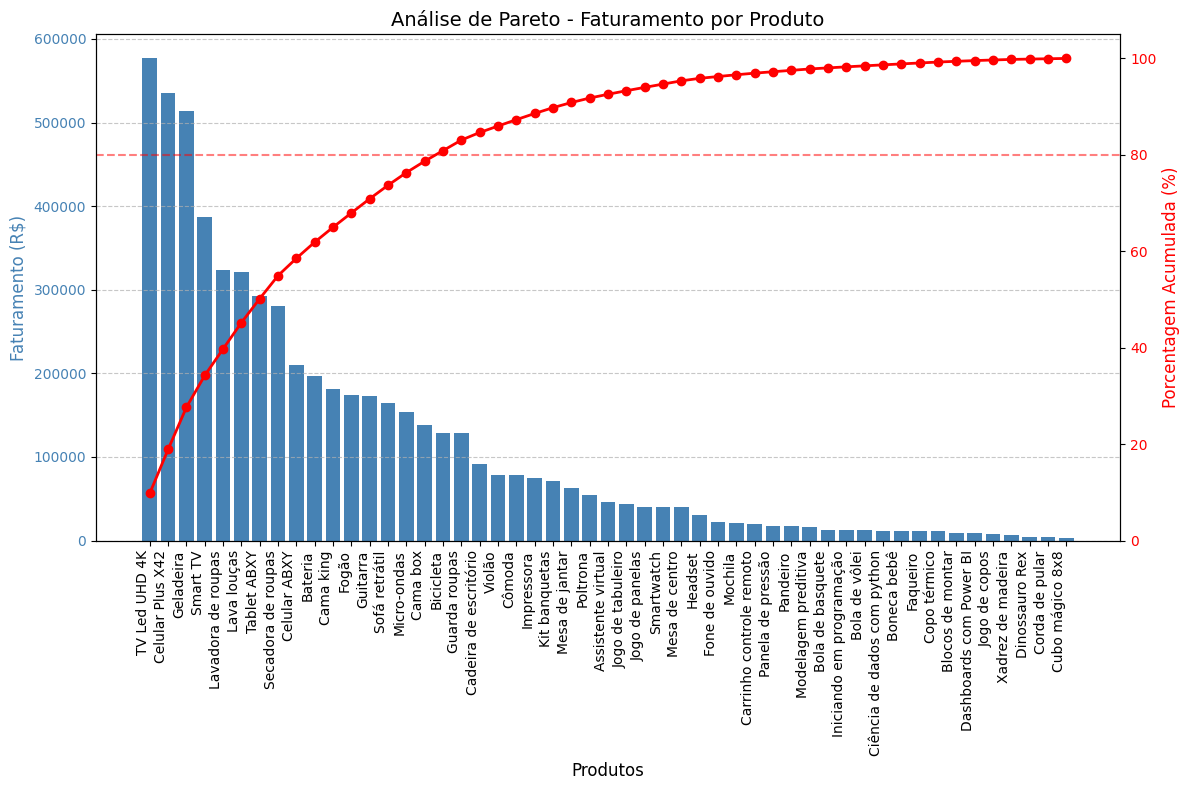

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Usar o DataFrame que você já criou (df_combinado_Produto)
def criar_grafico_pareto(df, coluna_valores='Faturado', coluna_nomes='Produtos', titulo='Análise de Pareto - Faturamento por Produto'):
    """
    Cria um gráfico de Pareto para visualizar a distribuição do faturamento por produto.

    Args:
        df: DataFrame contendo os dados organizados.
        coluna_valores: Nome da coluna que contém os valores para o gráfico (ex: 'Faturado').
        coluna_nomes: Nome da coluna que contém os nomes dos itens (ex: 'Produtos').
        titulo: Título do gráfico.
    """
    # Certifique-se de que o DataFrame está ordenado por valor (decrescente)
    df_ordenado = df.sort_values(by=coluna_valores, ascending=False).reset_index(drop=True)

    # Calcular a porcentagem acumulada
    df_ordenado['Porcentagem'] = 100 * df_ordenado[coluna_valores] / df_ordenado[coluna_valores].sum()
    df_ordenado['Porcentagem Acumulada'] = df_ordenado['Porcentagem'].cumsum()

    # Configurar a figura com tamanho adequado
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Criar barras para os valores
    bars = ax1.bar(df_ordenado[coluna_nomes], df_ordenado[coluna_valores], color='steelblue')

    # Configurar o eixo Y primário (valores)
    ax1.set_xlabel('Produtos', fontsize=12)
    ax1.set_ylabel('Faturamento (R$)', fontsize=12, color='steelblue')
    ax1.tick_params(axis='y', labelcolor='steelblue')

    # Rotacionar os rótulos do eixo X para melhor visualização
    plt.xticks(rotation=90, ha='right', fontsize=10)

    # Criar o segundo eixo Y para a porcentagem acumulada
    ax2 = ax1.twinx()
    ax2.plot(df_ordenado[coluna_nomes], df_ordenado['Porcentagem Acumulada'],
             'ro-', linewidth=2, markersize=6)

    # Adicionar linha horizontal em 80% (princípio de Pareto)
    ax2.axhline(y=80, color='r', linestyle='--', alpha=0.5)

    # Configurar o eixo Y secundário (porcentagem)
    ax2.set_ylabel('Porcentagem Acumulada (%)', fontsize=12, color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim([0, 105])  # Limite de 0-105% para visualização

    # Adicionar título
    plt.title(titulo, fontsize=14)

    # Adicionar grid para facilitar a leitura
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    # Ajustar layout para evitar sobreposição
    plt.tight_layout()

    # Retornar a figura e os eixos para possíveis personalizações adicionais
    return fig, (ax1, ax2)

# Chamar a função para criar o gráfico de Pareto
fig, axes = criar_grafico_pareto(df_combinado_Produto)

# Mostrar o gráfico
plt.show()

#5. Frete Médio por Loja

In [62]:
# Calcular a despesa de Frete  de cada loja
df_frete_loja = df_combinado.groupby('idLoja')['Frete'].sum().reset_index()

df_freteTotal = df_combinado['Frete'].sum()
df_combinado_total_faturado = df_combinado['Faturado'].sum()
df_percentual_frete = (df_freteTotal / df_combinado_total_faturado) * 100

# Certifique-se de que 'idLoja' em ambos os DataFrames tenha o mesmo tipo de dados
df_frete_loja['idLoja'] = df_frete_loja['idLoja'].astype(str)
df_combinado_loja['Loja'] = df_combinado_loja['Loja'].astype(str)


# Mesclar os DataFrames com base na coluna 'idLoja'
df_frete_loja = pd.merge(df_frete_loja, df_combinado_loja[['Loja', 'Faturado']], left_on='idLoja', right_on='Loja', how='left')

# Agora você pode calcular 'Frete(%)' corretamente
df_frete_loja['Frete(%)'] = (df_frete_loja['Frete'] / df_frete_loja['Faturado']) * 100

# Remover a coluna 'Loja' se desejar
df_frete_loja = df_frete_loja.drop(columns=['Loja'])

# Renomear a coluna 'idLoja' para 'Loja'
df_frete_loja = df_frete_loja.rename(columns={'idLoja':'Loja'})

print(f'Total de Frete: {df_freteTotal:,.2f}')
print(f'Faturamento total das lojas : {df_combinado_total_faturado:,.2f}')
print(f'percentual: {df_percentual_frete:.2f}%')

# Exibir o DataFrame com formatação de moeda
display(df_frete_loja.style.format({
    'Faturado': 'R$ {:,.2f}',
    'Frete': 'R$ {:,.2f}',
    'Frete(%)': '{:.2f}%'  # Formatar a coluna 'Frete(%)'
}))

Total de Frete: 312,930.66
Faturamento total das lojas : 5,871,490.79
percentual: 5.33%


,Loja,Frete,Faturado,Frete(%)
0,loja1,"R$ 81,837.97","R$ 1,534,509.12",5.33%
1,loja2,"R$ 79,314.16","R$ 1,488,459.06",5.33%
2,loja3,"R$ 78,022.66","R$ 1,464,025.03",5.33%
3,loja4,"R$ 73,755.88","R$ 1,384,497.58",5.33%


In [63]:
# Calculo da média de custo do frete por cada loja
df_frete_medio_loja = df_combinado.groupby('idLoja')['Frete'].mean().reset_index()

# Renomear a coluna frete
df_frete_medio_loja = df_frete_medio_loja.rename(columns={
    'idLoja': 'Loja',
    'Frete': 'Frete Médio'
})


display(df_frete_medio_loja.style.format({
    'Frete Médio': 'R$ {:,.2f}'
}))

,Loja,Frete Médio
0,loja1,R$ 34.69
1,loja2,R$ 33.62
2,loja3,R$ 33.07
3,loja4,R$ 31.28


#Análise Final e Recomendação

In [64]:
# 1. Loja menos eficiente Usando o total de vendas
loja_menos_eficiente_por_total_de_vendas = df_combinado_loja.sort_values('Faturado').head()
print("Loja Menos Eficiente (Total de Vendas):")
display(loja_menos_eficiente_por_total_de_vendas.style.format({
    'Faturado': 'R$ {:,.2f}',
    'Participação(%)': '{:.2f}%'
}))



Loja Menos Eficiente (Total de Vendas):


,Loja,Faturado,Participação(%)
3,loja4,"R$ 1,384,497.58",23.58%
2,loja3,"R$ 1,464,025.03",24.93%
1,loja2,"R$ 1,488,459.06",25.35%
0,loja1,"R$ 1,534,509.12",26.13%


In [65]:
# definição do período para análise de vendas médias mensais
data_inicial = pd.to_datetime('2022-10-01').to_period('M')
data_final = pd.to_datetime('2023-04-01').to_period('M')
df_entredatas = df_combinado[df_combinado['Mês/Ano'].between(data_inicial, data_final)]

df_mediamensaldevendas = df_entredatas.groupby(['idLoja'])['Faturado'].mean().reset_index()
loja_menos_eficiente_por_media_de_vendas = df_mediamensaldevendas.sort_values('Faturado').head()
print("\nLoja Menos Eficiente (Vendas Médias Mensais):")
display(loja_menos_eficiente_por_media_de_vendas)


Loja Menos Eficiente (Vendas Médias Mensais):


,idLoja,Faturado
3,loja4,504.33
2,loja3,557.42
1,loja2,611.21
0,loja1,645.74


#Relatório de Análise de Dados de Vendas
Introdução:

Este relatório apresenta as conclusões e insights obtidos a partir da análise dos dados de vendas de quatro lojas. O objetivo principal da análise foi identificar tendências, padrões e áreas de oportunidade para otimizar as vendas e a experiência do cliente.

Metodologia:

A análise foi realizada utilizando dados de vendas de quatro lojas, abrangendo informações sobre produtos, categorias, faturamento, frete,
avaliações de clientes e outros. Foram aplicadas técnicas de análise exploratória de dados, visualizações e cálculos de indicadores chave de desempenho.

Resultados e Conclusões:

Recomendação:

Recomendaria ao proprietário considerar a venda da Loja 4.

Argumentos:

Baixo Faturamento e Tendência Negativa: A Loja 4 apresenta o menor faturamento total entre todas as lojas. Além disso, a análise da tendência do faturamento médio mensal revela uma tendência negativa para essa loja,
indicando que as vendas têm diminuído ao longo do tempo.
Essa combinação de baixo faturamento e tendência negativa sugere que a Loja 4 pode não ser tão lucrativa quanto as outras.

Participação nas Vendas por Categoria: Não há variação expressiva nas vendas por categorias entre as lojas.

Avaliações dos Clientes: Embora a Loja 4 tenha uma avaliação média razoável, ela não se destaca em relação às outras lojas em termos de avaliações dos clientes.
As avaliações são um fator importante para a reputação e atratividade de uma loja, e a falta de destaque nesse quesito pode ser um ponto a ser considerado.

Frete Médio: O frete médio da Loja 4 é o mais baixo entre todas as lojas, porém em termos da participação do total faturado este valor é idêntico as demais lojas.

Análise Final: Considerando todos os fatores mencionados, a Loja 4 apresenta um desempenho inferior em comparação às outras lojas da rede.
Seu faturamento com tendência negativa, participação nas vendas de categorias sem destaque entre as demais lojas e a falta de destaque em
avaliações dos clientes indicam que a loja pode não ser tão lucrativa quanto as outras e pode não ter um grande potencial de crescimento futuro.

Conclusão:

Com base nessas análises, a venda da Loja 4 pode ser uma decisão estratégica para o proprietário, permitindo que ele concentre seus recursos e
esforços nas lojas mais lucrativas e com maior potencial de crescimento.
Os argumentos apresentados podem ser usados para justificar a decisão de venda.

Observações Adicionais:

É importante realizar uma análise mais aprofundada dos custos operacionais da Loja 4 para ter uma visão completa da sua rentabilidade.
A decisão de venda de uma loja deve ser tomada com cuidado, considerando todos os fatores relevantes e as possíveis consequências para o negócio.